In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

In [3]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [4]:
A.shape

(6, 2)

**Let us try to check if data is in Standard Normal Distributed or not**

In [5]:
A.mean()

0.0

In [6]:
A.std()

5.0

In [7]:
import pandas as pd

In [8]:
df=pd.DataFrame(A,columns=['a0','a1'])
df

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [9]:
df.mean()

a0    0.0
a1    0.0
dtype: float64

In [10]:
df.std()

a0    4.472136
a1    6.324555
dtype: float64

In [11]:
a0=A[:,0]
a1=A[:,1]

In [12]:
sigma=np.cov(a0,a1)
sigma

array([[20., 25.],
       [25., 40.]])

a0 and a1=25<br>
a0 and a0=20<br>
a1 and a1=40

### **Let us discuss now eigen value decomposition**

In [13]:
np.linalg.eig(sigma)

(array([ 3.07417596, 56.92582404]),
 array([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]]))

- FIrst array is the eigen value and
- Second is the eigen vector
- We had 2 columns so we are able to get 2 eigen values

In [14]:
l,x=np.linalg.eig(sigma)

In [15]:
l

array([ 3.07417596, 56.92582404])

In [16]:
x

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

#### We are always supposed to check if our axis are making 90 degree or not

In [17]:
sigma@x[:,0]

array([-2.54562438,  1.72347161])

In [18]:
sigma@x[:,1]

array([-31.91425695, -47.13840945])

In [19]:
#Our objective is to find out very first principle component and second principle component

In [20]:
print("first principal component")
x[:,1]

first principal component


array([-0.56062881, -0.82806723])

This is first bcoz when we used eigen values 56 was more than 3 

In [21]:
print("second principal component")
x[:,0]

second principal component


array([-0.82806723,  0.56062881])

In [22]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [23]:
pc1=A@x[:,1]
pc1

array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

- This is the transformed one array

In [24]:
pc2=A@x[:,0]
pc2

array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

### let's work with some dataet

In [25]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [26]:
df=df.drop('Type',axis=1)

In [27]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [28]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


- Mean is not 0 and average is not 1

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [31]:
de=scaler.fit_transform(df)

In [32]:
df=pd.DataFrame(de,columns=df.columns)

In [33]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [34]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


- Mean and Standard Deviation are 0 and 1

In [35]:
de

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [36]:
de.shape

(214, 9)

In [37]:
de.T@de/213

array([[ 1.00469484e+00, -1.92786249e-01, -1.22848096e-01,
        -4.09238363e-01, -5.44597046e-01, -2.91193428e-01,
         8.14207404e-01, -3.87831208e-04,  1.43681016e-01],
       [-1.92786249e-01,  1.00469484e+00, -2.75017087e-01,
         1.57529788e-01, -7.01365474e-02, -2.67335737e-01,
        -2.76735643e-01,  3.28136226e-01, -2.42479493e-01],
       [-1.22848096e-01, -2.75017087e-01,  1.00469484e+00,
        -4.84060474e-01, -1.66705721e-01,  5.42099905e-03,
        -4.45833360e-01, -4.94573208e-01,  8.34494798e-02],
       [-4.09238363e-01,  1.57529788e-01, -4.84060474e-01,
         1.00469484e+00, -5.54965338e-03,  3.27488767e-01,
        -2.60810752e-01,  4.81654624e-01, -7.47514567e-02],
       [-5.44597046e-01, -7.01365474e-02, -1.66705721e-01,
        -5.54965338e-03,  1.00469484e+00, -1.94238511e-01,
        -2.09712117e-01, -1.02630894e-01, -9.46429875e-02],
       [-2.91193428e-01, -2.67335737e-01,  5.42099905e-03,
         3.27488767e-01, -1.94238511e-01,  1.004694

In [38]:
sigma=np.cov(df)
sigma

array([[ 0.61967223,  0.1554839 ,  0.0095123 , ..., -0.36961439,
        -0.55499756, -0.52499357],
       [ 0.1554839 ,  0.23446913,  0.20927571, ..., -0.10528676,
        -0.06703188, -0.11242412],
       [ 0.0095123 ,  0.20927571,  0.26700812, ..., -0.07709654,
         0.03531121, -0.01133884],
       ...,
       [-0.36961439, -0.10528676, -0.07709654, ...,  2.02504465,
         1.91941657,  1.96842824],
       [-0.55499756, -0.06703188,  0.03531121, ...,  1.91941657,
         2.03457864,  2.03557203],
       [-0.52499357, -0.11242412, -0.01133884, ...,  1.96842824,
         2.03557203,  2.07393387]])

In [39]:
l,x=np.linalg.eig(de.T@de/213)

In [40]:
l

array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
       9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
       1.61637096e-03])

- **Eigen Values will always be equal to the number of columns**

In [41]:
max(l)

2.522953227212825

- So this will be PC1

In [42]:
pcs=pd.DataFrame(l).head()
pcs

,0
0,2.522953
1,2.059697
2,1.411440
3,1.163298
4,0.918293


- So these will be PC1,PC2,PC3,PC4,PC5

- So here we are even getting imaginary numbers

In [43]:
x

array([[-0.54517662,  0.28568318,  0.08691083, -0.14738099,  0.0735427 ,
        -0.11528772, -0.08186724, -0.7522159 ,  0.02573194],
       [ 0.2581256 ,  0.27035007, -0.38491962, -0.49124204, -0.1536833 ,
         0.55811757, -0.14858006, -0.12769315, -0.31193718],
       [-0.11088095, -0.59355826,  0.00841796, -0.37878577, -0.12350912,
        -0.30818598,  0.20604537, -0.07689061, -0.57727335],
       [ 0.42870863,  0.29521154,  0.32923712,  0.13750592, -0.01410888,
         0.01885731,  0.69923557, -0.27444105, -0.19222686],
       [ 0.22883635, -0.15509891, -0.45870884,  0.65253771, -0.00850012,
        -0.08609797, -0.21606658, -0.37992298, -0.29807321],
       [ 0.21934405, -0.15397013,  0.66257412,  0.03853544,  0.30703984,
         0.24363237, -0.50412141, -0.10981168, -0.26050863],
       [-0.49230609,  0.3453798 , -0.00098473,  0.27644322,  0.18818774,
         0.14866937,  0.09913463,  0.39870468, -0.57932321],
       [ 0.25037512,  0.48470218,  0.07405473, -0.13317545, -0

In [44]:
pc1=de@x[:,0]
pc1

array([-1.15113957e+00,  5.74137172e-01,  9.40159722e-01,  1.42083283e-01,
        3.51092291e-01,  2.90266583e-01,  2.52671444e-01,  1.20299466e-01,
        2.08160308e-02,  2.35222894e-03,  3.82514937e-01,  1.33538675e-02,
        3.09724390e-01, -1.56521013e-01,  8.99566628e-02,  1.15255023e-01,
       -1.73458320e-01, -1.45812372e+00, -5.47316267e-01,  3.08817022e-01,
       -2.05673879e-01, -1.21605345e+00, -4.11679297e-02,  1.13206012e-01,
        1.47523366e-01,  5.04865218e-02,  1.55773980e-01,  2.17093779e-01,
        1.15093633e-01,  6.58374915e-02, -2.98261451e-01,  2.22363433e-02,
       -3.96586112e-01,  6.90862734e-02, -8.17537725e-02,  3.88918640e-01,
       -2.57422809e-01, -2.70430953e-02, -1.93311245e+00, -1.93311245e+00,
       -2.13978802e-01, -1.73653764e-02,  9.91042449e-02, -1.90784649e+00,
       -7.55238909e-01, -4.15149070e-01, -6.04423395e-01, -2.97136159e+00,
       -2.07281161e+00, -3.93111591e-01, -2.72721095e+00, -7.23068883e-01,
       -1.06160451e-01, -

In [45]:
pc1.shape

(214,)

In [46]:
pcs[0][1] #This is for PC2

2.059696936891887

In [47]:
pc2=de@x[:,1]

In [48]:
pc2

array([-0.52948764, -0.75978777, -0.92983597, -0.96167744, -1.09124921,
       -1.32400756, -1.11614958, -1.22184622, -0.32193261, -1.06581344,
       -1.38013403, -1.10471913, -1.42304024, -1.23592823, -1.18125211,
       -1.16028212, -1.18243967,  0.09884138, -0.29566013, -0.76316216,
       -0.99918266, -0.43689611, -1.02788338, -1.02762181, -0.93376705,
       -1.04723075, -0.73814955, -1.03946718, -1.05293936, -0.90287584,
       -1.16489328, -1.16273745, -1.07307343, -1.16390421, -0.96601943,
       -1.00978004, -0.09893604, -0.94115087, -0.1421143 , -0.1421143 ,
       -1.06505169, -1.10093167, -0.74680692, -0.13514622, -1.19430193,
       -0.29328726, -0.78019985,  0.4631405 , -0.19367388, -0.34025819,
       -0.11303858, -0.47489193, -0.41450604, -0.4099579 , -0.51028779,
       -0.97207179, -1.81655603, -0.95745406, -1.10236197, -1.05432062,
       -0.5519114 ,  0.5683302 , -0.2964757 ,  0.18518682, -0.23485117,
       -0.0168166 , -0.42701387, -0.44708532, -0.36349866,  0.02

- **So we will be able to generate PC1, PC2, ....... till PC9**

### <font color='green'>Now how will we check if these PCS are correct?</font>

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [50]:
pca.fit_transform(df)

array([[ 1.15113957e+00, -5.29487638e-01],
       [-5.74137172e-01, -7.59787774e-01],
       [-9.40159722e-01, -9.29835966e-01],
       [-1.42083283e-01, -9.61677440e-01],
       [-3.51092291e-01, -1.09124921e+00],
       [-2.90266583e-01, -1.32400756e+00],
       [-2.52671444e-01, -1.11614958e+00],
       [-1.20299466e-01, -1.22184622e+00],
       [-2.08160308e-02, -3.21932609e-01],
       [-2.35222894e-03, -1.06581344e+00],
       [-3.82514937e-01, -1.38013403e+00],
       [-1.33538675e-02, -1.10471913e+00],
       [-3.09724390e-01, -1.42304024e+00],
       [ 1.56521013e-01, -1.23592823e+00],
       [-8.99566628e-02, -1.18125211e+00],
       [-1.15255023e-01, -1.16028212e+00],
       [ 1.73458320e-01, -1.18243967e+00],
       [ 1.45812372e+00,  9.88413780e-02],
       [ 5.47316267e-01, -2.95660130e-01],
       [-3.08817022e-01, -7.63162157e-01],
       [ 2.05673879e-01, -9.99182661e-01],
       [ 1.21605345e+00, -4.36896108e-01],
       [ 4.11679297e-02, -1.02788338e+00],
       [-1.

In [51]:
pc1

array([-1.15113957e+00,  5.74137172e-01,  9.40159722e-01,  1.42083283e-01,
        3.51092291e-01,  2.90266583e-01,  2.52671444e-01,  1.20299466e-01,
        2.08160308e-02,  2.35222894e-03,  3.82514937e-01,  1.33538675e-02,
        3.09724390e-01, -1.56521013e-01,  8.99566628e-02,  1.15255023e-01,
       -1.73458320e-01, -1.45812372e+00, -5.47316267e-01,  3.08817022e-01,
       -2.05673879e-01, -1.21605345e+00, -4.11679297e-02,  1.13206012e-01,
        1.47523366e-01,  5.04865218e-02,  1.55773980e-01,  2.17093779e-01,
        1.15093633e-01,  6.58374915e-02, -2.98261451e-01,  2.22363433e-02,
       -3.96586112e-01,  6.90862734e-02, -8.17537725e-02,  3.88918640e-01,
       -2.57422809e-01, -2.70430953e-02, -1.93311245e+00, -1.93311245e+00,
       -2.13978802e-01, -1.73653764e-02,  9.91042449e-02, -1.90784649e+00,
       -7.55238909e-01, -4.15149070e-01, -6.04423395e-01, -2.97136159e+00,
       -2.07281161e+00, -3.93111591e-01, -2.72721095e+00, -7.23068883e-01,
       -1.06160451e-01, -

- **We are getting the exact same values**

### <font color='green'> Let's work with explained variance ratio and screen plot</font>

In [52]:
pca=PCA()

In [53]:
PPPCCC=pca.fit_transform(df)

In [54]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [55]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

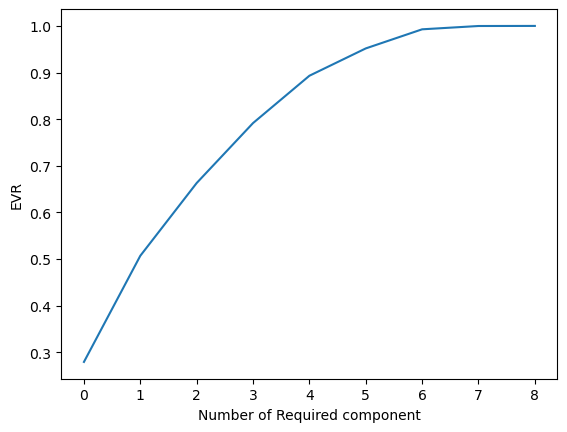

In [56]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Required component")
plt.ylabel("EVR");

- **This which we got here is the screen plot**
- **From this graph we can see 5 ot 6 features is enough and not more than that**

# <div class='alert alert-info'> Detailed Implementation</div>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [63]:
df=pd.read_csv('glass.csv')

In [64]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [65]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [66]:
df=df.drop('Type',axis=1)

In [67]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [68]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc=StandardScaler()

In [72]:
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [73]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [74]:
from sklearn.decomposition import PCA

In [75]:
pca=PCA()

In [76]:
pca.fit_transform(df)

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

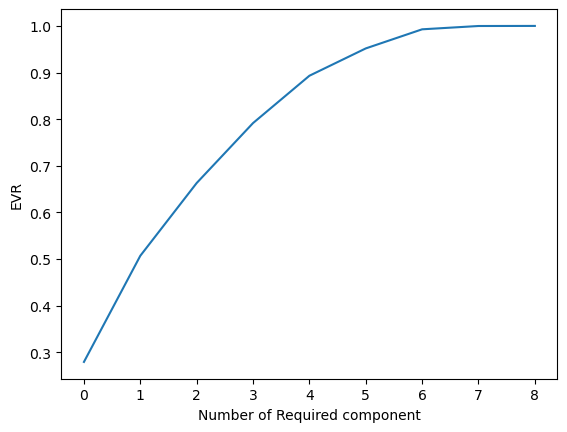

In [77]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Required component")
plt.ylabel("EVR");

In [80]:
pca1=PCA(n_components=5)

In [82]:
new_data=pca1.fit_transform(df)

In [83]:
new_data

array([[ 1.15113957, -0.52948764, -0.37209565,  1.72890103, -0.25193583],
       [-0.57413717, -0.75978777, -0.55670817,  0.76023228, -0.25707069],
       [-0.94015972, -0.92983597, -0.55490744,  0.20625431, -0.23750587],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, -0.17101386,  0.45168739],
       [-2.36974768,  2.7568728 , -1.23470076, -0.52528451,  0.51500795],
       [-2.26264885,  3.02859155, -0.89084474, -0.41449108,  0.50547398]])

In [87]:
pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5'])

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227
210,-2.397652,3.108236,-1.117502,0.288454,0.624723
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008


In [88]:
df=pd.read_csv('glass.csv')

In [89]:
x=pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5'])

In [91]:
y=df.Type

In [92]:
x.head()

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090


In [93]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
from sklearn import tree

In [96]:
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [97]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [102]:
pca1.transform([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]])

array([[-14.79669374,  -6.33840708, -37.61313627, -40.78614602,
          1.49953006]])

- **We entered 9 and we got 5 so this was what we wanted**

In [103]:
dt.predict(pca1.transform([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]]))

/Users/eshantdas/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5])

#### `But we should enter the standard scaler data`

In [105]:
dt.predict(pca1.transform(sc.transform([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]])))

/Users/eshantdas/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/eshantdas/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [107]:
def pc_calculation(x, no):
    pca = {}
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    l,x = np.linalg.eig((x_scaled.T @ x_scaled)/(x_scaled.shape[0]-1))
    for i in range(no):
        pc = x_scaled @x[:,i]
        pca[i] = pc
    pca_df = pd.DataFrame(pca)
    return pca_df